In [41]:
from Pricing_Functions import (
    get_todays_price,
    fetch_full_option_chain,
    enrich_option_data,
    calculate_bs_prices,
    price_option_vg_mc,
    price_option_nig_mc
)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



ImportError: cannot import name 'price_option_vg_mc' from 'Pricing_Functions' (c:\Users\Eyuel\Desktop\Pricing under Non-Normal\Pricing_Functions.py)

In [24]:
# Step 1: Get today's price
ticker = "AAPL"
S = get_todays_price(ticker)

# Step 2: Get options data
df = fetch_full_option_chain(ticker, max_expirations=5)

# Step 3: Enrich
enriched_df = enrich_option_data(df, underlying_price=S)

# Step 4: Apply Black-Scholes
bs_df = calculate_bs_prices(enriched_df, S)

# Step 5: View output
print(bs_df[["contractSymbol", "type", "strike", "lastPrice", "bs_price", "pricing_error"]].head())

Fetched 105 contracts for expiry 2025-03-14
Fetched 164 contracts for expiry 2025-03-21
Fetched 76 contracts for expiry 2025-03-28
Fetched 73 contracts for expiry 2025-04-04
Fetched 52 contracts for expiry 2025-04-11
        contractSymbol  type  strike  lastPrice    bs_price  pricing_error
0  AAPL250314C00100000  call   100.0     133.96  127.941619       6.018381
1  AAPL250314C00120000  call   120.0     120.95  107.901410      13.048590
2  AAPL250314C00130000  call   130.0      96.75   97.925713      -1.175713
3  AAPL250314C00140000  call   140.0      88.89   88.009557       0.880443
4  AAPL250314C00145000  call   145.0      84.85   82.925437       1.924563


In [25]:
bs_df["abs_error"] = bs_df["pricing_error"].abs()
bs_df.sort_values(by="abs_error", ascending=False).head(10)


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,contractSize,currency,type,expiration,moneyness,days_to_expiration,T,bs_price,pricing_error,abs_error
110,AAPL250321C00030000,2024-12-26 14:49:35+00:00,30.0,229.00,199.90,200.65,0.0,0.0,NaN,0,...,REGULAR,USD,call,2025-03-21,0.131845,11,0.030137,199.894226,29.105774,29.105774
260,AAPL250321P00310000,2024-12-27 16:51:23+00:00,310.0,56.25,73.50,74.35,0.0,0.0,1.0,0,...,REGULAR,USD,put,2025-03-21,1.362398,11,0.030137,82.039874,-25.789874,25.789874
267,AAPL250321P00370000,2024-12-27 16:51:36+00:00,370.0,116.35,133.45,135.25,0.0,0.0,2.0,0,...,REGULAR,USD,put,2025-03-21,1.626088,11,0.030137,141.958559,-25.608559,25.608559
265,AAPL250321P00350000,2024-12-31 14:38:19+00:00,350.0,97.80,113.30,114.80,0.0,0.0,5.0,0,...,REGULAR,USD,put,2025-03-21,1.538191,11,0.030137,121.985664,-24.185664,24.185664
101,AAPL250314P00275000,2025-02-24 19:35:51+00:00,275.0,26.80,46.10,47.75,0.0,0.0,1.0,0,...,REGULAR,USD,put,2025-03-14,1.208579,4,0.010959,47.436606,-20.636606,20.636606
347,AAPL250404C00130000,2025-02-24 15:09:33+00:00,130.0,118.84,97.60,98.45,0.0,0.0,NaN,4,...,REGULAR,USD,call,2025-04-04,0.571328,25,0.068493,98.408120,20.431880,20.431880
120,AAPL250321C00080000,2025-02-25 19:10:47+00:00,80.0,168.05,146.40,148.90,0.0,0.0,3.0,37,...,REGULAR,USD,call,2025-03-21,0.351587,11,0.030137,147.765283,20.284717,20.284717
113,AAPL250321C00045000,2024-12-27 16:43:30+00:00,45.0,209.40,189.95,192.50,0.0,0.0,2.0,1,...,REGULAR,USD,call,2025-03-21,0.197767,11,0.030137,190.274188,19.125812,19.125812
345,AAPL250404C00100000,2025-02-20 14:30:04+00:00,100.0,146.58,127.45,128.25,0.0,0.0,NaN,0,...,REGULAR,USD,call,2025-04-04,0.439483,25,0.068493,128.162673,18.417327,18.417327
413,AAPL250404P00275000,2025-02-25 15:17:15+00:00,275.0,28.80,47.05,47.95,0.0,0.0,40.0,0,...,REGULAR,USD,put,2025-04-04,1.208579,25,0.068493,47.032949,-18.232949,18.232949


In [26]:
undervalued = bs_df[
    (bs_df["pricing_error"] > 0.5) &   # Market price is lower than BS
    (bs_df["volume"] > 0) &           # Liquid enough
    (bs_df["inTheMoney"] == False) &  # Optional: focus on OTM for leverage
    (bs_df["moneyness"] > 0.95) & (bs_df["moneyness"] < 1.05)  # Near ATM
]

undervalued.sort_values("pricing_error", ascending=False).head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,contractSize,currency,type,expiration,moneyness,days_to_expiration,T,bs_price,pricing_error,abs_error
404,AAPL250404P00225000,2025-03-10 19:44:25+00:00,225.0,7.38,6.85,7.05,4.61,166.42600,758.0,979,...,REGULAR,USD,put,2025-04-04,0.988837,25,0.068493,6.546450,0.833550,0.833550
461,AAPL250411P00220000,2025-03-10 19:54:43+00:00,220.0,6.10,5.70,5.95,3.77,161.80258,505.0,918,...,REGULAR,USD,put,2025-04-11,0.966863,32,0.087671,5.465128,0.634872,0.634872
81,AAPL250314P00222500,2025-03-10 19:58:20+00:00,222.5,2.55,2.45,2.51,2.08,442.55316,14991.0,3452,...,REGULAR,USD,put,2025-03-14,0.977850,4,0.010959,2.021954,0.528046,0.528046


In [28]:
bs_df.to_csv("option_chain.csv", index=False)

In [29]:
bs_df.sort_values("impliedVolatility", ascending=False).head()
# Assume you've pulled daily IVs or calculated from options
# You can use approx implied vol for ATM calls or build a time series

def calculate_iv_percentile(current_iv, past_ivs):
    return sum(iv < current_iv for iv in past_ivs) / len(past_ivs)

# Example usage if you have a list of past IVs
iv_percentile = calculate_iv_percentile(current_iv=0.55, past_ivs=[0.3, 0.35, 0.4, 0.5, 0.52])
print(f"IV Percentile: {iv_percentile*100:.1f}%")

bs_df["relative_premium"] = bs_df["lastPrice"] / bs_df["strike"]
bs_df.sort_values("relative_premium", ascending=True).head()


IV Percentile: 100.0%


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,currency,type,expiration,moneyness,days_to_expiration,T,bs_price,pricing_error,abs_error,relative_premium
187,AAPL250321C00380000,2025-03-05 14:30:07+00:00,380.0,0.01,0.0,0.01,0.0,0.0,1.0,25562,...,USD,call,2025-03-21,1.670036,11,0.030137,0.002592,0.007408,0.007408,0.000026
186,AAPL250321C00370000,2025-03-06 18:28:51+00:00,370.0,0.01,0.0,0.01,0.0,0.0,12.0,2502,...,USD,call,2025-03-21,1.626088,11,0.030137,0.003058,0.006942,0.006942,0.000027
185,AAPL250321C00360000,2025-03-04 14:36:23+00:00,360.0,0.01,0.0,0.01,0.0,0.0,10.0,2718,...,USD,call,2025-03-21,1.582139,11,0.030137,0.002796,0.007204,0.007204,0.000028
184,AAPL250321C00350000,2025-03-10 18:34:52+00:00,350.0,0.01,0.0,0.01,0.0,0.0,100.0,4613,...,USD,call,2025-03-21,1.538191,11,0.030137,0.002602,0.007398,0.007398,0.000029
183,AAPL250321C00340000,2025-03-04 15:25:57+00:00,340.0,0.01,0.0,0.01,0.0,0.0,52.0,1582,...,USD,call,2025-03-21,1.494243,11,0.030137,0.003433,0.006567,0.006567,0.000029


In [30]:
bs_df["pricing_error"] = bs_df["lastPrice"] - bs_df["bs_price"]
bs_df.sort_values("pricing_error", ascending=False).head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,currency,type,expiration,moneyness,days_to_expiration,T,bs_price,pricing_error,abs_error,relative_premium
110,AAPL250321C00030000,2024-12-26 14:49:35+00:00,30.0,229.00,199.90,200.65,0.0,0.0,NaN,0,...,USD,call,2025-03-21,0.131845,11,0.030137,199.894226,29.105774,29.105774,7.633333
347,AAPL250404C00130000,2025-02-24 15:09:33+00:00,130.0,118.84,97.60,98.45,0.0,0.0,NaN,4,...,USD,call,2025-04-04,0.571328,25,0.068493,98.408120,20.431880,20.431880,0.914154
120,AAPL250321C00080000,2025-02-25 19:10:47+00:00,80.0,168.05,146.40,148.90,0.0,0.0,3.0,37,...,USD,call,2025-03-21,0.351587,11,0.030137,147.765283,20.284717,20.284717,2.100625
113,AAPL250321C00045000,2024-12-27 16:43:30+00:00,45.0,209.40,189.95,192.50,0.0,0.0,2.0,1,...,USD,call,2025-03-21,0.197767,11,0.030137,190.274188,19.125812,19.125812,4.653333
345,AAPL250404C00100000,2025-02-20 14:30:04+00:00,100.0,146.58,127.45,128.25,0.0,0.0,NaN,0,...,USD,call,2025-04-04,0.439483,25,0.068493,128.162673,18.417327,18.417327,1.465800


In [31]:
def label_expensive(row, iv_threshold=0.5, premium_threshold=0.15):
    if row["impliedVolatility"] > iv_threshold and row["relative_premium"] > premium_threshold:
        return "Expensive"
    return "Normal"

bs_df["valuation_label"] = bs_df.apply(label_expensive, axis=1)
bs_df.head(-1)


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,type,expiration,moneyness,days_to_expiration,T,bs_price,pricing_error,abs_error,relative_premium,valuation_label
0,AAPL250314C00100000,2025-03-05 14:42:20+00:00,100.0,133.96,127.35,129.05,0.000000,0.000000,1.0,0,...,call,2025-03-14,0.439483,4,0.010959,127.941619,6.018381,6.018381,1.339600,Expensive
1,AAPL250314C00120000,2025-02-26 18:24:10+00:00,120.0,120.95,107.40,108.80,0.000000,0.000000,11.0,7,...,call,2025-03-14,0.527380,4,0.010959,107.901410,13.048590,13.048590,1.007917,Expensive
2,AAPL250314C00130000,2025-03-10 14:22:57+00:00,130.0,96.75,97.40,98.85,-7.900002,-7.548974,2.0,1,...,call,2025-03-14,0.571328,4,0.010959,97.925713,-1.175713,1.175713,0.744231,Expensive
3,AAPL250314C00140000,2025-03-10 14:22:57+00:00,140.0,88.89,87.40,89.10,-11.709999,-11.640158,8.0,42,...,call,2025-03-14,0.615276,4,0.010959,88.009557,0.880443,0.880443,0.634929,Expensive
4,AAPL250314C00145000,2025-03-10 14:07:06+00:00,145.0,84.85,82.40,83.80,-4.180000,-4.695047,5.0,4,...,call,2025-03-14,0.637251,4,0.010959,82.925437,1.924563,1.924563,0.585172,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,AAPL250411P00235000,2025-03-10 19:16:22+00:00,235.0,13.45,12.25,12.55,7.550000,127.966100,97.0,722,...,put,2025-04-11,1.032785,32,0.087671,11.793708,1.656292,1.656292,0.057234,Normal
465,AAPL250411P00240000,2025-03-10 19:47:16+00:00,240.0,16.05,14.60,16.45,8.249999,105.769210,92.0,210,...,put,2025-04-11,1.054760,32,0.087671,15.610499,0.439501,0.439501,0.066875,Normal
466,AAPL250411P00245000,2025-03-10 19:17:44+00:00,245.0,20.80,18.20,19.55,10.749999,106.965160,26.0,34,...,put,2025-04-11,1.076734,32,0.087671,18.632746,2.167254,2.167254,0.084898,Normal
467,AAPL250411P00250000,2025-03-10 19:26:53+00:00,250.0,23.74,22.70,24.05,10.130000,74.430565,55.0,53,...,put,2025-04-11,1.098708,32,0.087671,23.076979,0.663021,0.663021,0.094960,Normal


In [ ]:
"""plt.figure(figsize=(10, 5))
plt.scatter(bs_df["moneyness"], bs_df["pricing_error"], alpha=0.5)
plt.axhline(0, linestyle="--", color="black")
plt.title("Pricing Error vs. Moneyness")
plt.xlabel("Moneyness (Strike / Spot)")
plt.ylabel("Market Price - BS Price")
plt.grid(True)
plt.show()"""


SyntaxError: incomplete input (2773295882.py, line 1)

📈 Spot Price of AAPL: $227.54
Fetched 105 contracts for expiry 2025-03-14
Fetched 164 contracts for expiry 2025-03-21
Fetched 76 contracts for expiry 2025-03-28
⚠️ Error on strike 100.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 120.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 130.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 140.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 145.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 150.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 155.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 160.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 165.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 170.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 175.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 180.0: name 'price_option_vg_mc' is not defined
⚠️ Error on strike 185.0: name 'pri

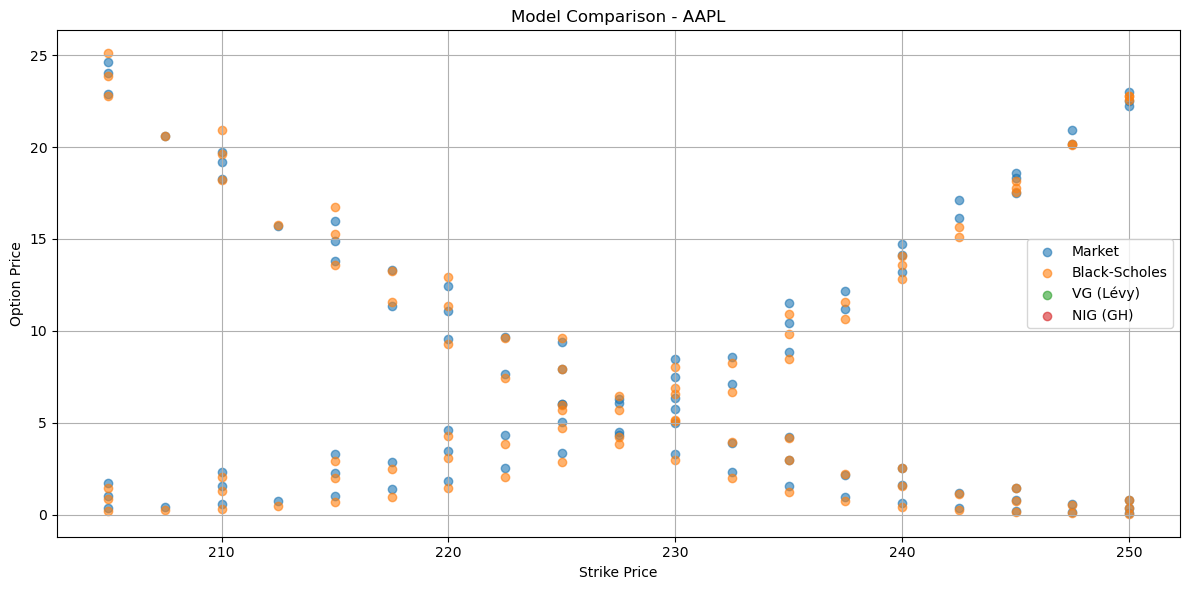

In [40]:
# -------------------------------
# 1. Configuration
# -------------------------------
ticker_symbol = "AAPL"
r = 0.045  # Risk-free rate
theta, nu = 0.1, 0.2  # VG parameters
alpha, beta, delta, mu = 3, -0.1, 0.2, 0  # NIG parameters

# -------------------------------
# 2. Fetch Market Data
# -------------------------------
S = get_todays_price(ticker_symbol)
print(f"📈 Spot Price of {ticker_symbol}: ${S}")

df = fetch_full_option_chain(ticker_symbol, max_expirations=3)
df = enrich_option_data(df, underlying_price=S)
df = df[
    (df["days_to_expiration"] > 0) &
    (df["impliedVolatility"].notna()) &
    (df["impliedVolatility"] > 0)
]

# -------------------------------
# 3. Black-Scholes Baseline
# -------------------------------
bs_df = calculate_bs_prices(df, S, r)

# -------------------------------
# 4. Compare with VG & NIG
# -------------------------------
def compare_models(row):
    K = row["strike"]
    T = row["days_to_expiration"] / 365
    sigma = row["impliedVolatility"]
    option_type = row["type"]

    try:
        vg = price_option_vg_mc(S, K, T, r, theta, sigma, nu, option_type)
        nig = price_option_nig_mc(S, K, T, r, alpha, beta, delta, mu, option_type)
    except Exception as e:
        print(f"⚠️ Error on strike {K}: {e}")
        return pd.Series([np.nan, np.nan])

    return pd.Series([vg, nig])

# Apply models
bs_df[["vg_price", "nig_price"]] = bs_df.apply(compare_models, axis=1)

# -------------------------------
# 5. Pricing Errors
# -------------------------------
bs_df["vg_error"] = bs_df["lastPrice"] - bs_df["vg_price"]
bs_df["nig_error"] = bs_df["lastPrice"] - bs_df["nig_price"]

# -------------------------------
# 6. Display Results
# -------------------------------
print(bs_df[[
    "contractSymbol", "type", "strike", "lastPrice",
    "bs_price", "vg_price", "nig_price",
    "pricing_error", "vg_error", "nig_error"
]].dropna().head())

# -------------------------------
# 7. Visual Comparison Plot
# -------------------------------
atm = bs_df[(bs_df["moneyness"] >= 0.9) & (bs_df["moneyness"] <= 1.1)]

plt.figure(figsize=(12, 6))
plt.scatter(atm["strike"], atm["lastPrice"], label="Market", alpha=0.6)
plt.scatter(atm["strike"], atm["bs_price"], label="Black-Scholes", alpha=0.6)
plt.scatter(atm["strike"], atm["vg_price"], label="VG (Lévy)", alpha=0.6)
plt.scatter(atm["strike"], atm["nig_price"], label="NIG (GH)", alpha=0.6)
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title(f"Model Comparison - {ticker_symbol}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 8. Save CSV (Optional)
# -------------------------------
bs_df.to_csv(f"{ticker_symbol}_options_model_comparison.csv", index=False)


In [36]:
bs_df.head(10)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,expiration,moneyness,days_to_expiration,T,bs_price,pricing_error,vg_price,nig_price,vg_error,nig_error
0,AAPL250314C00100000,2025-03-05 14:42:20+00:00,100.0,133.96,127.35,129.05,0.000000,0.000000,1.0,0,...,2025-03-14,0.439483,4,0.010959,127.941619,6.018381,None,None,NaN,NaN
1,AAPL250314C00120000,2025-02-26 18:24:10+00:00,120.0,120.95,107.40,108.80,0.000000,0.000000,11.0,7,...,2025-03-14,0.527380,4,0.010959,107.901410,13.048590,None,None,NaN,NaN
2,AAPL250314C00130000,2025-03-10 14:22:57+00:00,130.0,96.75,97.40,98.85,-7.900002,-7.548974,2.0,1,...,2025-03-14,0.571328,4,0.010959,97.925713,-1.175713,None,None,NaN,NaN
3,AAPL250314C00140000,2025-03-10 14:22:57+00:00,140.0,88.89,87.40,89.10,-11.709999,-11.640158,8.0,42,...,2025-03-14,0.615276,4,0.010959,88.009557,0.880443,None,None,NaN,NaN
4,AAPL250314C00145000,2025-03-10 14:07:06+00:00,145.0,84.85,82.40,83.80,-4.180000,-4.695047,5.0,4,...,2025-03-14,0.637251,4,0.010959,82.925437,1.924563,None,None,NaN,NaN
5,AAPL250314C00150000,2025-03-10 14:46:17+00:00,150.0,78.17,77.40,79.10,-9.360001,-10.693478,4.0,23,...,2025-03-14,0.659225,4,0.010959,78.022075,0.147925,None,None,NaN,NaN
6,AAPL250314C00155000,2025-03-10 14:46:17+00:00,155.0,73.18,72.40,74.25,-11.839996,-13.926131,4.0,7,...,2025-03-14,0.681199,4,0.010959,73.074636,0.105364,None,None,NaN,NaN
7,AAPL250314C00160000,2025-03-10 14:38:59+00:00,160.0,69.36,67.25,67.65,-6.839996,-8.976374,3.0,4,...,2025-03-14,0.703173,4,0.010959,67.690163,1.669837,None,None,NaN,NaN
8,AAPL250314C00165000,2025-03-06 16:40:57+00:00,165.0,71.25,62.45,63.85,0.000000,0.000000,4.0,4,...,2025-03-14,0.725147,4,0.010959,62.979115,8.270885,None,None,NaN,NaN
9,AAPL250314C00170000,2025-03-10 14:38:59+00:00,170.0,59.35,57.45,59.15,-7.370003,-11.046166,3.0,17,...,2025-03-14,0.747121,4,0.010959,58.081346,1.268654,None,None,NaN,NaN
